<p style="font-size:200%; font-weight:bold"> Merge</p>

- Author: Yichen Luo
- Date: 20220710

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)
InteractiveShell.ast_node_interactivity = 'all'
os.getcwd()

RD = '/home/yichen/2022_nft/02_rdata/'
WD = '/home/yichen/2022_nft/03_wdata/'
RES = '/home/yichen/2022_nft/04_result/'

'/home/team_defi/01_code'

# Panel

In [2]:
dexes = {
'ethereum' : ['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
'binance': ['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
'avalanche' : ['traderjoe_avalanche', 'pangolin_avalanche'],
'fantom' : ['spookyswap_fantom', 'spiritswap_fantom'],
'polygon' : ['quickswap_polygon', 'sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']
}

chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
error = ['pancake_binance', 'quickswap_polygon', 'spookyswap_fantom', 'sushiswap_polygon', 'uniswapv2_ethereum']

dfs = []
info_insider = ['root', 'tokenName', 'tokenSymbol', 'contractAddress']

for chain in chains:
    for dex in dexes[chain]:
        lst = pd.read_csv(f'{WD}insider_new/list/root_{dex}_list.csv')
        dfss = []
        
        for idx, row in lst.loc[lst['csv'] > 0].iterrows():
            root = row['root']
            csv = row['csv']
            
            for csv_num in range(1, (csv + 1)):
                df = pd.read_csv(f'{WD}insider_new/{root}_{dex}_{csv_num}.csv')
                if dex in error: df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  

                for info in info_insider:
                    df[f'insider_{info}'] = row[info]
                    
                df['dex'] = dex
                df['chain'] = chain
                
                dfss.append(df)
        try:
            dfss = pd.concat(dfss)
        except:
            continue
            
        dfss.rename(columns={'token0':'token0_name', 'token1':'token1_name'}, inplace=True)
        if 'amount0In' in dfss.keys():
            for idx, row in dfss.iterrows():
                if row['amount0In'] == 0:
                    dfss.loc[dfss['id'] == row['id'], 'amount0'] = - row['amount0Out']
                    dfss.loc[dfss['id'] == row['id'], 'amount1'] = row['amount1In']
                else:
                    dfss.loc[dfss['id'] == row['id'], 'amount0'] = row['amount0In']
                    dfss.loc[dfss['id'] == row['id'], 'amount1'] = - row['amount1Out']
        dfs.append(dfss)
        print(f'{dex}完成合并')  
        
dfs = pd.concat(dfs)
dfs.drop(columns=['amount0In', 'amount0Out', 'amount1In', 'amount1Out'], inplace=True)
dfs

uniswapv3_ethereum完成合并
uniswapv2_ethereum完成合并
sushiswap_ethereum完成合并
pancake_binance完成合并
biswap_binance完成合并
apeswap_binance完成合并
babyswap_binance完成合并
jetswap_binance完成合并
traderjoe_avalanche完成合并
pangolin_avalanche完成合并
spookyswap_fantom完成合并
spiritswap_fantom完成合并
quickswap_polygon完成合并
sushiswap_polygon完成合并


,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,from,to
0,0x3bf474e8fa69c27549073765b34dde30a30a6ca98595fa83f51192f43c8586cb#369426,-1.197772e+06,5.210000e+02,1.198016e+06,6,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xe592427a0aece92de3edee1f18e0157c05861564,1653320999381348173678892919116746,198929.0,2021-07-26 01:39:18,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3bf474e8fa69c27549073765b34dde30a30a6ca98595fa83f51192f43c8586cb,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
0,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947#11201,-6.300000e+08,3.045070e-01,1.313451e+03,142,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xe592427a0aece92de3edee1f18e0157c05861564,1739360052492861393024856,-214543.0,2021-11-01 01:56:12,Dogelon,Wrapped Ether,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
1,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947#833859,1.311124e+03,-3.045070e-01,1.312287e+03,141,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x610a94f64d1d149623369e5bac9576065d23893b,0xe592427a0aece92de3edee1f18e0157c05861564,1207715477751701179052131841673446,192647.0,2021-11-01 01:56:12,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
0,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4#1009028,1.151991e+00,-2.167361e+03,2.162294e+03,700,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,3437151724244765900381421,-200919.0,2022-05-12 21:41:30,Wrapped Ether,Tether USD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
1,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4#60801,4.822255e+09,-1.151991e+00,2.157227e+03,697,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1228873597918384533902084,-221491.0,2022-05-12 21:41:30,Dogelon,Wrapped Ether,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0xefb3203c00a0e55d001c2f5aeaaec31cb5cfa0663b4d82eb18f414c74b075741-0,3.000000e+01,4.706006e+01,4.752094e+01,605,NaN,NaN,0x1b02da8cb0d097eb8d57a175b88c7d8b47997506,NaN,NaN,2022-01-30 22:22:32,Wrapped Matic,(PoS) Tether USD,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0xc2132d05d31c914a87c6611c10748aeb04b58e8f,0xefb3203c00a0e55d001c2f5aeaaec31cb5cfa0663b4d82eb18f414c74b075741,0x5a6dc942826807539ca19d21c132e4b004075de0,Wrapped Matic,WMATIC,0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270,sushiswap_polygon,polygon,NaN,0x5a6dc942826807539ca19d21c132e4b004075de0
0,0x12d95fd183eb494df5

# Panel New

In [4]:
dexes = {
'ethereum' : ['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
'binance': ['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
'avalanche' : ['traderjoe_avalanche', 'pangolin_avalanche'],
'fantom' : ['spookyswap_fantom', 'spiritswap_fantom'],
'polygon' : ['quickswap_polygon', 'sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']
}

chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
error = ['pancake_binance', 'quickswap_polygon', 'spookyswap_fantom', 'sushiswap_polygon', 'uniswapv2_ethereum']

dfs = []
info_insider = ['root', 'tokenName', 'tokenSymbol', 'contractAddress']

for chain in chains:
    for dex in dexes[chain]:
        lst = pd.read_csv(f'{WD}insider_new/list/root_{dex}_list.csv')
        dfss = []
        
        for idx, row in lst.loc[lst['csv'] > 0].iterrows():
            root = row['root']
            csv = row['csv']
            
            for csv_num in range(1, (csv + 1)):
                df = pd.read_csv(f'{WD}insider_new/{root}_{dex}_{csv_num}.csv')
                if dex in error: df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  

                for info in info_insider:
                    df[f'insider_{info}'] = row[info]
                    
                df['dex'] = dex
                df['chain'] = chain
                
                dfss.append(df)
        try:
            dfss = pd.concat(dfss)
        except:
            continue
            
        dfss.rename(columns={'token0':'token0_name', 'token1':'token1_name'}, inplace=True)
        if 'amount0' in dfss.keys():
            for idx, row in dfss.iterrows():
                if row['amount0'] > 0:
                    dfss.loc[dfss['id'] == row['id'], 'amount0Out'] = 0
                    dfss.loc[dfss['id'] == row['id'], 'amount0In'] = row['amount0']
                    dfss.loc[dfss['id'] == row['id'], 'amount1Out'] = row['amount1']
                    dfss.loc[dfss['id'] == row['id'], 'amount1In'] = 0
                    
                else:
                    dfss.loc[dfss['id'] == row['id'], 'amount0Out'] = row['amount0']
                    dfss.loc[dfss['id'] == row['id'], 'amount0In'] = 0
                    dfss.loc[dfss['id'] == row['id'], 'amount1Out'] = 0
                    dfss.loc[dfss['id'] == row['id'], 'amount1In'] = row['amount1']
        dfs.append(dfss)
        print(f'{dex}完成合并')  
        
dfs = pd.concat(dfs)
dfs.drop(columns=['amount1', 'amount0'], inplace=True)
dfs

uniswapv3_ethereum完成合并
uniswapv2_ethereum完成合并
sushiswap_ethereum完成合并


FileNotFoundError: [Errno 2] No such file or directory: '/home/yichen/2022_nft/03_wdata/insider_new/0x57b85ec48b6c8acf7fc396d459d1c71f8a6064bf_pancake_binance_1.csv'

In [ ]:
dfs.to_csv(f'{RES}teamwallet_insider.csv', index=False)
# dfs.to_excel(f'{RES}teamwallet_insider.xlsx', index=False)

In [10]:
dfs.describe()

,amount0,amount1,amountUSD,logIndex,tick
count,9.732800e+04,9.732800e+04,9.732800e+04,97328.000000,5302.000000
mean,1.614801e+20,3.937824e+19,5.008358e+03,174.007069,-4600.715956
std,1.882935e+22,5.122092e+21,3.495796e+04,171.431419,172700.653022
min,-8.401007e+13,-2.841815e+12,0.000000e+00,2.000000,-887272.000000
25%,8.723963e-01,1.000000e-01,1.142238e+02,47.000000,-184180.000000
50%,1.000000e+03,1.034027e+00,5.056748e+02,125.000000,-42674.000000
75%,1.230345e+07,2.265223e+02,2.047310e+03,253.000000,193790.000000
max,5.157164e+24,1.000000e+24,3.177862e+06,4225.000000,439606.000000


# Descriptive Statistics

## Number of Insiders

In [9]:
dexes = {
'ethereum' : ['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
'binance': ['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
'avalanche' : ['traderjoe_avalanche', 'pangolin_avalanche'],
'fantom' : ['spookyswap_fantom', 'spiritswap_fantom'],
'polygon' : ['quickswap_polygon', 'sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']
}

chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']

dfm = []

total_sum = 0
insider_sum = 0

for chain in chains:
    for dex in dexes[chain]:
        df = pd.read_csv(f'{WD}insider_new/list/root_{dex}_list.csv').drop_duplicates('root', keep='last')
        
        insider = df.loc[df['csv'] >0].shape[0]
        total = df.shape[0]
        
        insider_percentage = insider/total
        
        total_sum += total
        insider_sum += insider
        
        dfm.append(df)
        
        print(f'{dex}发现潜在内幕交易者{insider}/{total} ({insider_percentage})')

percentage_sum = insider_sum/total_sum        
print(f'\n总内幕交易者{insider_sum}/{total_sum} ({percentage_sum})')

dfm = pd.concat(dfm).sort_values('root', ascending=False).drop_duplicates('root', keep='first')
insider = dfm.loc[dfm['csv'] >0].shape[0]
total = dfm.shape[0]

print(f'\n非重复总内幕交易者{insider_sum}/{total_sum} ({percentage_sum})')

uniswapv3_ethereum发现潜在内幕交易者640/8090 (0.07911001236093942)
uniswapv2_ethereum发现潜在内幕交易者3181/8090 (0.39320148331273175)
sushiswap_ethereum发现潜在内幕交易者99/8090 (0.012237330037082819)
pancake_binance发现潜在内幕交易者22/8119 (0.0027096933119842345)
biswap_binance发现潜在内幕交易者26/8119 (0.003202364823254095)
apeswap_binance发现潜在内幕交易者41/8119 (0.005049882990516073)
babyswap_binance发现潜在内幕交易者10/8119 (0.001231678778174652)
jetswap_binance发现潜在内幕交易者2/8119 (0.0002463357556349304)
traderjoe_avalanche发现潜在内幕交易者383/853 (0.4490035169988277)
pangolin_avalanche发现潜在内幕交易者117/853 (0.13716295427901523)
spookyswap_fantom发现潜在内幕交易者10/20 (0.5)
spiritswap_fantom发现潜在内幕交易者3/20 (0.15)
quickswap_polygon发现潜在内幕交易者15/31 (0.4838709677419355)
sushiswap_polygon发现潜在内幕交易者3/31 (0.0967741935483871)
apeswap_polygon发现潜在内幕交易者0/31 (0.0)
jetswap_polygon发现潜在内幕交易者0/31 (0.0)

总内幕交易者4552/66735 (0.0682100846632202)

非重复总内幕交易者4552/66735 (0.0682100846632202)


## Transactions

In [17]:
dexes = {
'ethereum' : [('uniswapv3_ethereum',1), ('uniswapv2_ethereum',0), ('sushiswap_ethereum',2)],
'binance': [('pancake_binance',0), ('biswap_binance',0), ('apeswap_binance',0), ('babyswap_binance',0), ('jetswap_binance',0)],
'avalanche' : [('traderjoe_avalanche',2), ('pangolin_avalanche',0)],
'fantom' : [('spookyswap_fantom',2), ('spiritswap_fantom',2)],
'polygon' : [('quickswap_polygon',0), ('sushiswap_polygon',2), ('apeswap_polygon',0), ('jetswap_polygon',0)]
}

chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']

txn = 0
amount = 0
dfm = pd.read_csv(f'{RES}teamwallet_insider.csv')

for chain in chains:
    for dex_info in dexes[chain]:
        
        dex = dex_info[0]
        check_num = dex_info[1]
        
        dfs = pd.read_csv(f'{WD}{dex}.csv', chunksize=10**6, iterator=True)
        
        for chunk in dfs:
            txn += chunk.shape[0]
            amount += chunk['amountUSD'].sum()
        
        dfm_amount = dfm.loc[dfm['dex'] == dex, 'amountUSD'].sum()
        dfm_txn = dfm.loc[dfm['dex'] == dex, :].shape[0]
        
        percentage_amount = dfm_amount / amount
        percentage_txn = dfm_txn / txn
        
        print(f'\n{dex}内幕交易数目{dfm_txn}/{txn}, ({percentage_txn})')
        print(f'{dex}内幕交易金额{dfm_amount}/{amount}, ({percentage_amount})')

/tmp/ipykernel_1785895/2489031288.py:13: DtypeWarning: Columns (5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfm = pd.read_csv(f'{RES}teamwallet_insider.csv')



uniswapv3_ethereum内幕交易数目5302/14199536, (0.0003733924826839412)
uniswapv3_ethereum内幕交易金额191910441.71912974/567021494944.7003, (0.00033845355675245805)


/tmp/ipykernel_1785895/2489031288.py:23: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in dfs:



uniswapv2_ethereum内幕交易数目63282/90935619, (0.0006958989304290104)
uniswapv2_ethereum内幕交易金额215402919.60493836/1.2797251952765348e+18, (1.6831966769114997e-10)

sushiswap_ethereum内幕交易数目683/99775308, (6.845381023529389e-06)
sushiswap_ethereum内幕交易金额14481453.56569605/1.2797253801012014e+18, (1.1316063423350131e-11)

pancake_binance内幕交易数目1158/170601610, (6.787743679558475e-06)
pancake_binance内幕交易金额7821337.12509617/1.27972546807835e+18, (6.1117304610970796e-12)

biswap_binance内幕交易数目146/188762182, (7.734600143581726e-07)
biswap_binance内幕交易金额1458412.2960651156/1.2797255025507151e+18, (1.1396290010304918e-12)

apeswap_binance内幕交易数目1242/209784309, (5.920366522741222e-06)
apeswap_binance内幕交易金额480844.5267248588/1.2903667626493622e+18, (3.726417485658076e-13)

babyswap_binance内幕交易数目261/217811896, (1.1982816585922378e-06)
babyswap_binance内幕交易金额487612.37828417995/1.290366787168967e+18, (3.778866467525792e-13)

jetswap_binance内幕交易数目2/218518154, (9.152557640588526e-09)
jetswap_binance内幕交易金额61.28637716592

In [15]:
dfm.loc[dfm['dex'] == 'uniswapv3_ethereum', 'amountUSD'].sum()
dfm.loc[dfm['dex'] == 'uniswapv3_ethereum', :].shape[0]

191910441.71912974

5302

In [64]:
dexes = {
'ethereum' : [('uniswapv3_ethereum',1), ('uniswapv2_ethereum',0), ('sushiswap_ethereum',2)],
'binance': [('pancake_binance',0), ('biswap_binance',0), ('apeswap_binance',0), ('babyswap_binance',0), ('jetswap_binance',0)],
'avalanche' : [('traderjoe_avalanche',2), ('pangolin_avalanche',0)],
'fantom' : [('spookyswap_fantom',2), ('spiritswap_fantom',2)],
'polygon' : [('quickswap_polygon',0), ('sushiswap_polygon',2), ('apeswap_polygon',0), ('jetswap_polygon',0)]
}

chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']

total_amount = 0
dfm = pd.read_csv(f'{RES}teamwallet_insider.csv')

for chain in chains:
    for dex_info in dexes[chain]:
        
        dex = dex_info[0]
        check_num = dex_info[1]
        
        dfm_amount = dfm.loc[dfm['dex'] == dex, 'amountUSD'].sum()
        dfm_txn = dfm.loc[dfm['dex'] == dex, :].shape[0]
        
        total_amount += dfm_amount
        
print(f'总内幕交易金额{total_amount}')

/tmp/ipykernel_1785895/1357632936.py:12: DtypeWarning: Columns (5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfm = pd.read_csv(f'{RES}teamwallet_insider.csv')


总内幕交易金额487453498.51965857


## Ranking

### Total Ranking

In [19]:
dfs = pd.read_csv(f'{RES}teamwallet_insider.csv')
dfs

/tmp/ipykernel_1785895/1449678049.py:1: DtypeWarning: Columns (5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = pd.read_csv(f'{RES}teamwallet_insider.csv')


,id,amount0,amount1,amountUSD,logIndex,origin,recipient,sender,sqrtPriceX96,tick,timestamp,token0_name,token1_name,token0_id,token1_id,transaction_id,insider_root,insider_tokenName,insider_tokenSymbol,insider_contractAddress,dex,chain,from,to
0,0x3bf474e8fa69c27549073765b34dde30a30a6ca98595fa83f51192f43c8586cb#369426,-1.197772e+06,5.210000e+02,1.198016e+06,6,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xe592427a0aece92de3edee1f18e0157c05861564,1653320999381348173678892919116746,198929.0,2021-07-26 01:39:18,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3bf474e8fa69c27549073765b34dde30a30a6ca98595fa83f51192f43c8586cb,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
1,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947#11201,-6.300000e+08,3.045070e-01,1.313451e+03,142,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xe592427a0aece92de3edee1f18e0157c05861564,1739360052492861393024856,-214543.0,2021-11-01 01:56:12,Dogelon,Wrapped Ether,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
2,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947#833859,1.311124e+03,-3.045070e-01,1.312287e+03,141,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x610a94f64d1d149623369e5bac9576065d23893b,0xe592427a0aece92de3edee1f18e0157c05861564,1207715477751701179052131841673446,192647.0,2021-11-01 01:56:12,USD Coin,Wrapped Ether,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x68fbedaf1cdde57091609c9a69e8adb0de4f8bfb557f4899dbe50c9207d8b947,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
3,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4#1009028,1.151991e+00,-2.167361e+03,2.162294e+03,700,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,3437151724244765900381421,-200919.0,2022-05-12 21:41:30,Wrapped Ether,Tether USD,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdac17f958d2ee523a2206206994597c13d831ec7,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
4,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4#60801,4.822255e+09,-1.151991e+00,2.157227e+03,697,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,1228873597918384533902084,-221491.0,2022-05-12 21:41:30,Dogelon,Wrapped Ether,0x761d38e5ddf6ccf6cf7c55759d5210750b5d60f3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xe20d90f9fe1c9c3b0b00f2e71a41a375bce01bc21ac9b02226a64a1e504b5bb4,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,SYNC,SYNC,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,uniswapv3_ethereum,ethereum,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97323,0xefb3203c00a0e55d001c2f5aeaaec31cb5cfa0663b4d82eb18f414c74b075741-0,3.000000e+01,4.706006e+01,4.752094e+01,605,NaN,NaN,0x1b02da8cb0d097eb8d57a175b88c7d8b47997506,NaN,NaN,2022-01-30 22:22:32,Wrapped Matic,(PoS) Tether USD,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0xc2132d05d31c914a87c6611c10748aeb04b58e8f,0xefb3203c00a0e55d001c2f5aeaaec31cb5cfa0663b4d82eb18f414c74b075741,0x5a6dc942826807539ca19d21c132e4b004075de0,Wrapped Matic,WMATIC,0x0d500B1d8E8eF31E21C99d1Db9A6444d3ADf1270,sushiswap_polygon,polygon,NaN,0x5a6dc942826807539ca19d21c132e4b004075de0
97324,0x12d95fd183

In [65]:
dfs.groupby(['insider_root'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)
dfs.groupby(['insider_contractAddress'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)
dfs.groupby(['insider_contractAddress','insider_tokenName'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)
dfs.groupby(['insider_contractAddress','insider_tokenName','insider_tokenSymbol', 'dex'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)

,insider_root,amountUSD
650,0x2d407ddb06311396fe14d4b49da5f0471447d45c,4.720571e+07
477,0x20f7c7e4b410af0d7309a04792fc22c7b4c7f46e,4.549605e+07
2520,0xa99c602037f8e85a44bbe88f3c0ee3af60345b9b,2.555613e+07
2054,0x8ca246551ffa910223a444fdccebfe8daf8ee838,2.121517e+07
2951,0xc7df5da2cf8dcaa8858c06dada7cf9eba3c71fbf,1.678258e+07
2733,0xb9a28b6749eeb871ff4984943e7b7010736dc44a,1.497937e+07
2619,0xb2068ec3d8093336d7022539a518494919fede94,1.407768e+07
3207,0xd7d82a1e32e2f1a82446360390b10a6e05f0e5f3,1.341829e+07
2469,0xa625141e73ab1af1b57efbbad9ba9ab8813393e3,1.178606e+07
2052,0x8c82cfb2d3c982087c5dbca4e6c2fa953769a3f4,1.024664e+07


,insider_contractAddress,amountUSD
334,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,1.081528e+08
93,0x2840a9fc9ad15738c762e404300761ec828affcb,4.720571e+07
20,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,3.410487e+07
983,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,2.555613e+07
283,0x8c6fa66c21ae3fc435790e451946a9ea82e6e523,2.522667e+07
788,0xa71d0588eaf47f12b13cf8ec750430d21df04974,2.346278e+07
990,0xd039C9079ca7F2a87D632A9C0d7cEa0137bAcFB5,1.497937e+07
1374,0xfbeb1954b3325ef5288e080cfd28009ac012baf5,1.341829e+07
175,0x505a84a03e382331a1be487b632cf357748b65d6,1.277787e+07
824,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,1.178606e+07


,insider_contractAddress,insider_tokenName,amountUSD
334,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,Wrapped Ether,1.081528e+08
93,0x2840a9fc9ad15738c762e404300761ec828affcb,Bearn Finance,4.720571e+07
20,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,Governance OHM,3.410487e+07
983,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,FLOKI,2.555613e+07
283,0x8c6fa66c21ae3fc435790e451946a9ea82e6e523,MetaFabric,2.522667e+07
788,0xa71d0588eaf47f12b13cf8ec750430d21df04974,Shiba Predator,2.346278e+07
990,0xd039C9079ca7F2a87D632A9C0d7cEa0137bAcFB5,Ape-X,1.497937e+07
1374,0xfbeb1954b3325ef5288e080cfd28009ac012baf5,TANJIRO,1.341829e+07
175,0x505a84a03e382331a1be487b632cf357748b65d6,SHIBGF,1.277787e+07
824,0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32,SYNC,1.178606e+07


,insider_contractAddress,insider_tokenName,insider_tokenSymbol,dex,amountUSD
516,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,Wrapped Ether,WETH,uniswapv2_ethereum,6.455767e+07
517,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,Wrapped Ether,WETH,uniswapv3_ethereum,4.310364e+07
148,0x2840a9fc9ad15738c762e404300761ec828affcb,Bearn Finance,BFI,uniswapv2_ethereum,3.751439e+07
450,0x8c6fa66c21ae3fc435790e451946a9ea82e6e523,MetaFabric,FABRIC,uniswapv3_ethereum,2.300192e+07
1265,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,FLOKI,FLOKI,uniswapv3_ethereum,1.792674e+07
31,0x0ab87046fbb341d058f17cbc4c1133f25a20a52f,Governance OHM,gOHM,uniswapv3_ethereum,1.697362e+07
1273,0xd039C9079ca7F2a87D632A9C0d7cEa0137bAcFB5,Ape-X,APE-X,traderjoe_avalanche,1.497937e+07
1021,0xa71d0588eaf47f12b13cf8ec750430d21df04974,Shiba Predator,QOM,uniswapv3_ethereum,1.190042e+07
1020,0xa71d0588eaf47f12b13cf8ec750430d21df04974,Shiba Predator,QOM,uniswapv2_ethereum,1.109816e+07
40,0x0da67235dd5787d67955420c84ca1cecd4e5bb3b,Wrapped MEMO,wMEMO,traderjoe_avalanche,1.057602e+07


In [75]:
top_token_amount = dfs.groupby(['insider_contractAddress'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)['amountUSD'].values
top_token_address = dfs.groupby(['insider_contractAddress'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)['insider_contractAddress'].values
for address in top_token_address:
    dfs.loc[dfs['insider_contractAddress'] == address, ['insider_tokenName','dex']].reset_index().drop_duplicates('insider_tokenName')


,index,insider_tokenName
0,3417,Wrapped Ether


,index,insider_tokenName
0,1110,Bearn Finance


,index,insider_tokenName
0,2767,Governance OHM


,index,insider_tokenName
0,707,FLOKI


,index,insider_tokenName
0,2093,MetaFabric


,index,insider_tokenName
0,878,Shiba Predator


,index,insider_tokenName
0,88687,Ape-X


,index,insider_tokenName
0,392,TANJIRO


,index,insider_tokenName
0,1531,SHIBGF


,index,insider_tokenName
0,0,SYNC


<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0.0e+00, 2.0e+07, 4.0e+07, 6.0e+07, 8.0e+07, 1.0e+08, 1.2e+08]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'Amount USD')

Text(0.5, 0, 'Token Name')

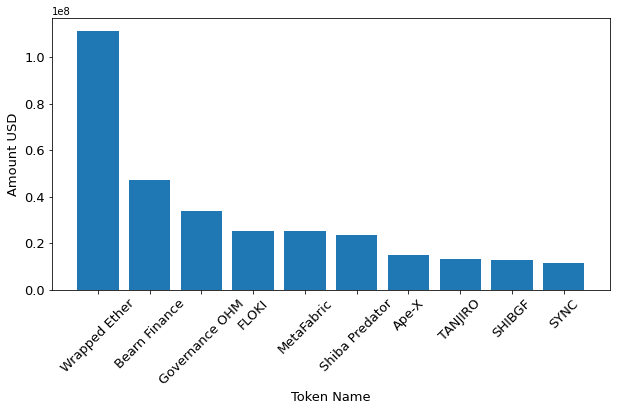

In [63]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(top_token_name, top_token_amount)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=13)
ax.set_ylabel('Amount USD', fontsize=13)
ax.set_xlabel('Token Name', fontsize=13)
plt.show()

<BarContainer object of 10 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([       0., 10000000., 20000000., 30000000., 40000000., 50000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'Amount USD')

Text(0.5, 0, 'Wallet')

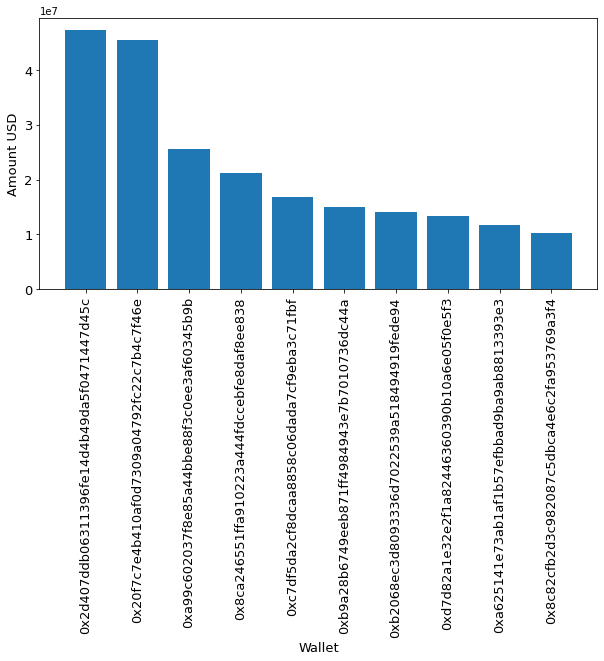

In [70]:
top_wallet_name = dfs.groupby(['insider_root'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)['insider_root']
top_wallet_amount = dfs.groupby(['insider_root'])['amountUSD'].sum().reset_index().sort_values('amountUSD', ascending=False).head(10)['amountUSD']

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(top_wallet_name, top_wallet_amount)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
ax.set_ylabel('Amount USD', fontsize=13)
ax.set_xlabel('Wallet', fontsize=13)
plt.show()

<AxesSubplot:>

,amount0,amount1,amountUSD,logIndex,tick
count,9.732800e+04,9.732800e+04,9.732800e+04,97328.000000,5302.000000
mean,1.614801e+20,3.937824e+19,5.008358e+03,174.007069,-4600.715956
std,1.882935e+22,5.122092e+21,3.495796e+04,171.431419,172700.653022
min,-8.401007e+13,-2.841815e+12,0.000000e+00,2.000000,-887272.000000
25%,8.723963e-01,1.000000e-01,1.142238e+02,47.000000,-184180.000000
50%,1.000000e+03,1.034027e+00,5.056748e+02,125.000000,-42674.000000
75%,1.230345e+07,2.265223e+02,2.047310e+03,253.000000,193790.000000
max,5.157164e+24,1.000000e+24,3.177862e+06,4225.000000,439606.000000


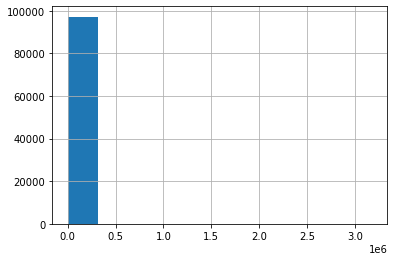

In [82]:
dfs['amountUSD'].hist(bins=10)
dfs.describe()

(array([9.6888e+04, 2.9200e+02, 5.3000e+01, 3.9000e+01, 2.3000e+01,
        5.0000e+00, 8.0000e+00, 9.0000e+00, 2.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([      0.        ,  158893.08042226,  317786.16084451,
         476679.24126677,  635572.32168902,  794465.40211128,
         953358.48253354, 1112251.56295579, 1271144.64337805,
        1430037.7238003 , 1588930.80422256, 1747823.88464482,
        1906716.96506707, 2065610.04548933, 2224503.12591158,
        2383396.20633384, 2542289.2867561 , 2701182.36717835,
        2860075.44760061, 3018968.52802286, 3177861.60844512]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Amount USD')

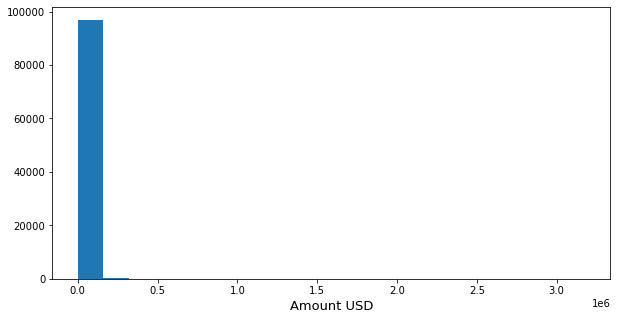

In [89]:
amount = dfs['amountUSD'].values
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(amount, bins=20)
ax.set_xlabel('Amount USD', fontsize=13)
plt.show()

<AxesSubplot:>

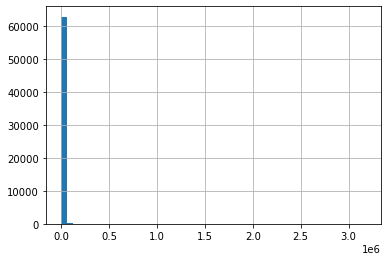

In [110]:
dfm.loc[dfm['dex'] == 'uniswapv2_ethereum','amountUSD'].hist(bins=50)

In [114]:
dfm.loc[dfm['dex'] == 'uniswapv2_ethereum'].describe(datetime_is_numeric=True)

,amount0,amount1,amountUSD,logIndex,tick
count,6.328200e+04,6.328200e+04,6.328200e+04,63282.000000,0.0
mean,2.483402e+20,6.056080e+19,3.403858e+03,209.083231,NaN
std,2.335107e+22,6.352146e+21,1.924815e+04,167.748493,NaN
min,0.000000e+00,0.000000e+00,1.500000e-15,3.000000,NaN
25%,2.730571e+00,7.620412e-02,2.033298e+02,84.000000,NaN
50%,2.911679e+04,5.224793e-01,6.295109e+02,174.000000,NaN
75%,4.000000e+08,5.000000e+02,2.289033e+03,293.000000,NaN
max,5.157164e+24,1.000000e+24,3.177862e+06,4225.000000,NaN
